In [81]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


--> angry: 0.01%
--> disgust: 0.00%
--> scared: 0.00%
--> happy: 99.86%
--> sad: 0.00%
--> surprised: 0.00%
--> neutral: 0.13%
--> angry: 0.55%
--> disgust: 0.00%
--> scared: 7.21%
--> happy: 0.18%
--> sad: 6.12%
--> surprised: 73.03%
--> neutral: 12.92%
--> angry: 8.77%
--> disgust: 0.02%
--> scared: 17.47%
--> happy: 0.10%
--> sad: 56.12%
--> surprised: 13.30%
--> neutral: 4.22%
--> angry: 50.51%
--> disgust: 12.62%
--> scared: 1.55%
--> happy: 2.63%
--> sad: 2.61%
--> surprised: 0.00%
--> neutral: 30.08%
--> angry: 59.52%
--> disgust: 0.49%
--> scared: 10.08%
--> happy: 0.01%
--> sad: 10.66%
--> surprised: 9.36%
--> neutral: 9.88%
--> angry: 0.02%
--> disgust: 0.01%
--> scared: 4.54%
--> happy: 0.01%
--> sad: 0.30%
--> surprised: 94.38%
--> neutral: 0.74%


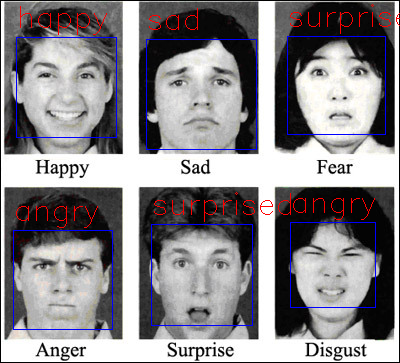

In [96]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

# parameters for loading data and images
detection_model_path = '/content/gdrive/MyDrive/DLP Project/3_Emotion_Detection/haarcascade_frontalface_default.xml'
emotion_model_path = '/content/gdrive/MyDrive/DLP Project/3_Emotion_Detection/_mini_XCEPTION.102-0.66.hdf5'

# hyper-parameters for bounding boxes shape
# loading models

face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised",
 "neutral"]


#feelings_faces = []
#for index, emotion in enumerate(EMOTIONS):
   # feelings_faces.append(cv2.imread('emojis/' + emotion + '.png', -1))

# frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/31ee72c875e41d4585542024c820c687.jpg')
# frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/Female_Emotions_732x549-thumbnail.jpg')
# frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/depositphotos_19353231-stock-photo-very-sad-man.jpg')
# frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/download.jpg')
frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/tumblr_inline_plfjp2KZNe1sq56mk_400.jpg')
# frame = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/happy-person-portrait-friendly-black-woman-curly-hair-looking-camera-smiling-posing-over-yellow-background-perfect-217303617.jpg')

#reading the frame
#frame = imutils.resize(frame,width=300)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)

frameClone = frame.copy()
for (fX, fY, fW, fH) in faces:

  # print(faces)
    # faces = sorted(faces, reverse=True,
    # key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
    # (fX, fY, fW, fH) = faces

  # cv2.rectangle(frame,(fX,fY),(fX+fW,fY+fH),(255,0,0))
  cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),(255,0,0))
  roi_gray=gray[fY:fY+fW,fX:fX+fH]#cropping region of interest i.e. face area from  image
  roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

  # img_pixels = img_to_array(roi_gray)
  # img_pixels = np.expand_dims(img_pixels, axis = 0)
  # img_pixels /= 255

  roi = gray[fY:fY + fH, fX:fX + fW]
  roi = cv2.resize(roi, (64, 64))
  roi = roi.astype("float") / 255.0
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis=0)
    
    
  preds = emotion_classifier.predict(roi)[0]
  emotion_probability = np.max(preds)
  label = EMOTIONS[preds.argmax()]


  for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
    # construct the label text
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    print("-->", text)            
    w = int(prob * 300)
    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255)
    # cv2.putText(frameClone, label, (fX, fY - 10),
    # cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
  print("====================")

  # cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),(255,0,0))
  cv2.putText(frameClone, label, (fX, fY - 10),
          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
            # cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0))
#    for c in range(0, 3):
#        frame[200:320, 10:130, c] = emoji_face[:, :, c] * \
#        (emoji_face[:, :, 3] / 255.0) + frame[200:320,
#        10:130, c] * (1.0 - emoji_face[:, :, 3] / 255.0)


cv2_imshow(frameClone)
# cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()